## MSDS 7331 - Machine Learning 1  Chcago Traffic Crashes Analysis(DJ)

### Importing the libraries needed for the project 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.model_selection import ShuffleSplit
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import datetime
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import make_scorer
#from sklearn.grid_search import GridSearchCV
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier


### Loading the dataset

In [2]:
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None) # display all columns


In [3]:
df = pd.read_csv("G:\SMU Data Science\SMU Courses\Mechine_Learning-1\Sample Data sets\Data_Sets_DJ\Traffic_Crashes.csv")
data = pd.read_csv("G:\SMU Data Science\SMU Courses\Mechine_Learning-1\Sample Data sets\Data_Sets_DJ\Traffic_Crashes.csv")
#data.set_index('CRASH_TYPE', inplace=True)

C:\Users\Dil Jay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



### Quick look at the data 

#### The inital dimension of the dataset:

In [4]:
data.shape

(376660, 48)

In [5]:
df.head(5)

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,JC334993,NaN,7/4/2019 22:33,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",7/4/2019 23:05,FOLLOWING TOO CLOSELY,NOT APPLICABLE,300,N,LAKE SHORE DR SB,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,5,7,41.886140,-87.614274,POINT (-87.614274106164 41.8861404879)
1,JC370822,NaN,7/30/2019 10:22,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",7/30/2019 10:25,FAILING TO YIELD RIGHT-OF-WAY,IMPROPER TURNING/NO SIGNAL,8201,S,DR MARTIN LUTHER KING JR DR,631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,7,41.745549,-87.614670,POINT (-87.614669906271 41.745549113377)
2,JC387098,NaN,8/10/2019 17:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",8/10/2019 17:35,EQUIPMENT - VEHICLE CONDITION,NOT APPLICABLE,6747,S,CREGIER AVE,332.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,7,8,41.772004,-87.581234,POINT (-87.58123401629 41.772004323752)
3,JC395195,NaN,8/16/2019 16:53,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",8/16/2019 16:53,UNABLE TO DETERMINE,NOT APPLICABLE,554,N,FRANKLIN ST,1831.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,6,8,41.892327,-87.635742,POINT (-87.635741843096 41.89232650689)
4,JC396604,NaN,8/17/2019 16:04,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",8/17/2019 18:30,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3700,N,WESTERN AVE,1921.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,7,8,41.948637,-87.688458,POINT (-87.688457506457 41.948636883802)


In [6]:
row, column = df.shape

####  CALCULATE Usefullness of columns in percentages

In [7]:

round(((row - df.isnull().sum())/ row) * 100)

RD_NO                            100.0
CRASH_DATE_EST_I                   7.0
CRASH_DATE                       100.0
POSTED_SPEED_LIMIT               100.0
TRAFFIC_CONTROL_DEVICE           100.0
DEVICE_CONDITION                 100.0
WEATHER_CONDITION                100.0
LIGHTING_CONDITION               100.0
FIRST_CRASH_TYPE                 100.0
TRAFFICWAY_TYPE                  100.0
LANE_CNT                          53.0
ALIGNMENT                        100.0
ROADWAY_SURFACE_COND             100.0
ROAD_DEFECT                      100.0
REPORT_TYPE                       98.0
CRASH_TYPE                       100.0
INTERSECTION_RELATED_I            22.0
NOT_RIGHT_OF_WAY_I                 5.0
HIT_AND_RUN_I                     28.0
DAMAGE                           100.0
DATE_POLICE_NOTIFIED             100.0
PRIM_CONTRIBUTORY_CAUSE          100.0
SEC_CONTRIBUTORY_CAUSE           100.0
STREET_NO                        100.0
STREET_DIRECTION                 100.0
STREET_NAME              

In [8]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
376630    False
376631    False
376632    False
376633    False
376634    False
376635    False
376636    False
376637    False
376638    False
376639    False
376640    False
376641    False
376642    False
376643    False
376644    False
376645    False
376646    False
376647    False
376648    False
376649    False
376650    False
376651    False
376652    False
376653    False
376654    False
376655    False
376656    False
376657    False
376658    False
376659    False
Length: 376660, dtype: b

#### Occurance of traffic crashes by street locations

In [9]:
df['STREET_NAME'].value_counts()

WESTERN AVE                        10290
PULASKI RD                          8966
CICERO AVE                          8145
ASHLAND AVE                         8091
HALSTED ST                          7118
KEDZIE AVE                          6335
MICHIGAN AVE                        5394
STATE ST                            4701
CLARK ST                            4568
NORTH AVE                           4520
GRAND AVE                           4036
CALIFORNIA AVE                      3911
DAMEN AVE                           3790
IRVING PARK RD                      3787
STONY ISLAND AVE                    3784
ARCHER AVE                          3723
CENTRAL AVE                         3604
BELMONT AVE                         3598
FULLERTON AVE                       3510
87TH ST                             3438
CHICAGO AVE                         3408
MADISON ST                          3385
63RD ST                             3268
ROOSEVELT RD                        3131
MILWAUKEE AVE   

#### Primary contributory case for traffic crashes 

In [10]:
df2 = df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()
df2

UNABLE TO DETERMINE                                                                 136165
FAILING TO YIELD RIGHT-OF-WAY                                                        42280
FOLLOWING TOO CLOSELY                                                                42044
NOT APPLICABLE                                                                       20400
IMPROPER OVERTAKING/PASSING                                                          18365
IMPROPER BACKING                                                                     17147
FAILING TO REDUCE SPEED TO AVOID CRASH                                               15402
IMPROPER LANE USAGE                                                                  15296
IMPROPER TURNING/NO SIGNAL                                                           12814
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  11758
DISREGARDING TRAFFIC SIGNALS                                                          6141

#### Separating the "year" from the "CRASH_DATE" variable column as "year " column

In [11]:
df['year'] = pd.DatetimeIndex(data['CRASH_DATE']).year
df.head()

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,year
0,JC334993,NaN,7/4/2019 22:33,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",7/4/2019 23:05,FOLLOWING TOO CLOSELY,NOT APPLICABLE,300,N,LAKE SHORE DR SB,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,5,7,41.886140,-87.614274,POINT (-87.614274106164 41.8861404879),2019
1,JC370822,NaN,7/30/2019 10:22,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",7/30/2019 10:25,FAILING TO YIELD RIGHT-OF-WAY,IMPROPER TURNING/NO SIGNAL,8201,S,DR MARTIN LUTHER KING JR DR,631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,7,41.745549,-87.614670,POINT (-87.614669906271 41.745549113377),2019
2,JC387098,NaN,8/10/2019 17:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",8/10/2019 17:35,EQUIPMENT - VEHICLE CONDITION,NOT APPLICABLE,6747,S,CREGIER AVE,332.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,7,8,41.772004,-87.581234,POINT (-87.58123401629 41.772004323752),2019
3,JC395195,NaN,8/16/2019 16:53,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",8/16/2019 16:53,UNABLE TO DETERMINE,NOT APPLICABLE,554,N,FRANKLIN ST,1831.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,6,8,41.892327,-87.635742,POINT (-87.635741843096 41.89232650689),2019
4,JC396604,NaN,8/17/2019 16:04,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",8/17/2019 18:30,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3700,N,WESTERN AVE,1921.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,7,8,41.948637,-87.688458,POINT (-87.688457506457 41.948636883802),2019


#### Lets look at the date length of the data set

In [12]:
start_date = df.CRASH_DATE.min()
start_date

'1/1/2016 0:01'

In [13]:
end_date = df.CRASH_DATE.max()
end_date

'9/9/2019 9:55'

### Below are the attributes in the data set and the type

#### Data types

In [14]:
data.dtypes

RD_NO                             object
CRASH_DATE_EST_I                  object
CRASH_DATE                        object
POSTED_SPEED_LIMIT                 int64
TRAFFIC_CONTROL_DEVICE            object
DEVICE_CONDITION                  object
WEATHER_CONDITION                 object
LIGHTING_CONDITION                object
FIRST_CRASH_TYPE                  object
TRAFFICWAY_TYPE                   object
LANE_CNT                          object
ALIGNMENT                         object
ROADWAY_SURFACE_COND              object
ROAD_DEFECT                       object
REPORT_TYPE                       object
CRASH_TYPE                        object
INTERSECTION_RELATED_I            object
NOT_RIGHT_OF_WAY_I                object
HIT_AND_RUN_I                     object
DAMAGE                            object
DATE_POLICE_NOTIFIED              object
PRIM_CONTRIBUTORY_CAUSE           object
SEC_CONTRIBUTORY_CAUSE            object
STREET_NO                          int64
STREET_DIRECTION

#### Data attributes(Colmns)

In [15]:
df.columns

Index(['RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE

### Looking at the Numerical and Object variables(Columns) of the raw data set

#### Descriptive statistics within the data set (Numerical)

In [16]:
data.describe(include=['number'])

,POSTED_SPEED_LIMIT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,376660.000000,376660.000000,376656.000000,375212.000000,374443.000000,374443.000000,374443.000000,374443.000000,374443.000000,374443.000000,374443.0,376660.000000,376660.000000,376660.000000,374673.000000,374673.000000
mean,28.243095,3579.569084,1248.573446,2.020730,0.163384,0.000881,0.017714,0.089012,0.055776,2.025927,0.0,13.179257,4.122105,6.924144,41.858157,-87.671961
std,6.665311,2906.347178,710.435208,0.416654,0.522897,0.032261,0.155752,0.383072,0.301130,1.160508,0.0,5.455726,1.967450,3.446322,0.358901,0.732669
min,0.000000,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.934014
25%,30.000000,1199.000000,714.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.788110,-87.720415
50%,30.000000,3100.000000,1214.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.878217,-87.672403
75%,30.000000,5500.000000,1824.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924989,-87.632829
max,99.000000,451100.000000,2535.000000,18.000000,21.000000,3.000000,7.000000,21.000000,10.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


#### Descriptive statistics within the data set (Numerical)

In [17]:
data.describe(include=['object'])

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_DIRECTION,STREET_NAME,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,MOST_SEVERE_INJURY,LOCATION
count,376660,27992,376660,376660,376660,376660,376660,376660,376660,198549.0,376660,376660,376660,367952,376660,83150,17357,104658,376660,376660,376660,376660,376658,376659,4768,7604,1263,2644,2098,617,374436,374673
unique,376660,2,241537,19,8,11,6,18,20,62.0,6,7,7,2,2,2,2,2,3,287531,40,40,4,1536,2,2,2,2,4,2,5,174989
top,JB364891,Y,11/10/2017 10:30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Y,Y,Y,"OVER $1,500",6/30/2018 21:30,UNABLE TO DETERMINE,NOT APPLICABLE,W,WESTERN AVE,Y,Y,Y,Y,CONSTRUCTION,Y,NO INDICATION OF INJURY,POINT (-87.905309125103 41.976201139024)
freq,1,24295,27,216836,218848,297570,247036,93130,171019,73249.0,367338,281671,314077,228863,290587,79243,15861,100122,212406,11,136165,150050,134467,10290,3719,6182,863,2098,1497,554,329119,485


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376660 entries, 0 to 376659
Data columns (total 49 columns):
RD_NO                            376660 non-null object
CRASH_DATE_EST_I                 27992 non-null object
CRASH_DATE                       376660 non-null object
POSTED_SPEED_LIMIT               376660 non-null int64
TRAFFIC_CONTROL_DEVICE           376660 non-null object
DEVICE_CONDITION                 376660 non-null object
WEATHER_CONDITION                376660 non-null object
LIGHTING_CONDITION               376660 non-null object
FIRST_CRASH_TYPE                 376660 non-null object
TRAFFICWAY_TYPE                  376660 non-null object
LANE_CNT                         198549 non-null object
ALIGNMENT                        376660 non-null object
ROADWAY_SURFACE_COND             376660 non-null object
ROAD_DEFECT                      376660 non-null object
REPORT_TYPE                      367952 non-null object
CRASH_TYPE                       376660 non-null ob

### Reported Vehicle Accidents from 2013 to 2020

In [19]:
fatal = df['INJURIES_FATAL'].sum()
incapacitating= df['INJURIES_INCAPACITATING'].sum()
non_incapacitating = df['INJURIES_NON_INCAPACITATING'].sum()
rnev = df['INJURIES_REPORTED_NOT_EVIDENT'].sum()
nind = df['INJURIES_NO_INDICATION'].sum()
unknown = df['INJURIES_UNKNOWN'].sum()


In [20]:
Total = fatal + incapacitating
Total

6963.0

In [21]:
print("The total death in car crash accidents since the year {}, up to {} is {}.".format(start_date, end_date,fatal))
print("The total number of incapacitating and non-incapacitating injuries are  {}, {} respectively".format(incapacitating,non_incapacitating))
print("The total number of repoted not evident and no indication injuries are  {}, {} respectively".format(rnev,nind))
print("The total number of unknown injuries are  {}".format(unknown))

The total death in car crash accidents since the year 1/1/2016 0:01, up to 9/9/2019 9:55 is 330.0.
The total number of incapacitating and non-incapacitating injuries are  6633.0, 33330.0 respectively
The total number of repoted not evident and no indication injuries are  20885.0, 758594.0 respectively
The total number of unknown injuries are  0.0


#### Since the total number of unknown injuries are  0.0 we should the remove the column "INJURIES_UNKNOWN"

## Visualizing the data

In [22]:
count2013 = np.mean(df["year"])
print("Mean of accidents happened in all states in year 2013: {}".format(count2013))

Mean of accidents happened in all states in year 2013: 2017.7916317102959


#### Traffic crash types by the year( Bar charts)

C:\Users\Dil Jay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



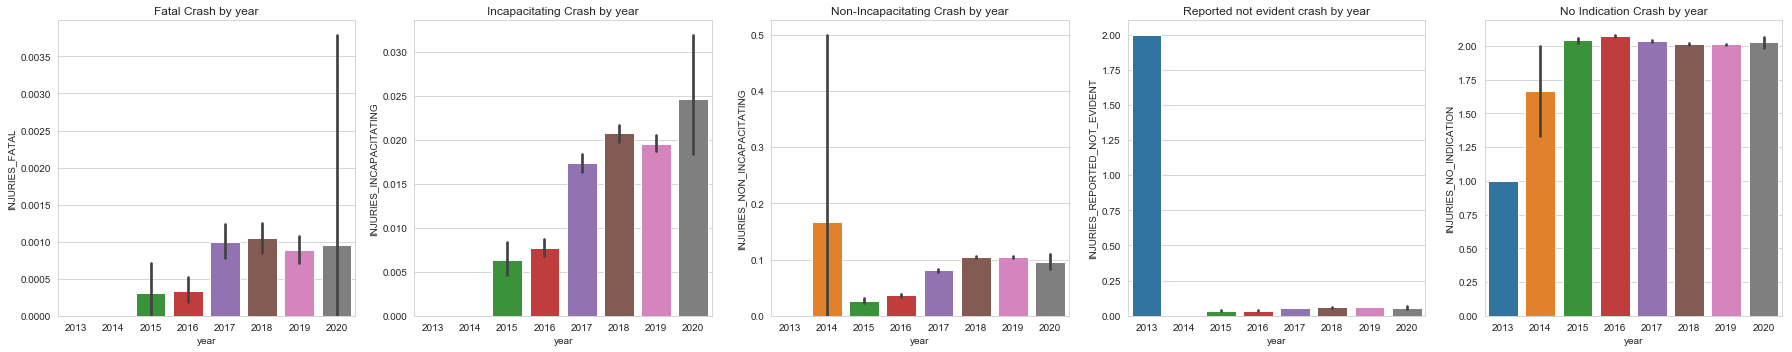

In [23]:
fig, ax = plt.subplots(1, 5, figsize = (25, 5));

sns.barplot(x="year", y="INJURIES_FATAL",  data=df, ax=ax[0]);
sns.barplot(x="year", y="INJURIES_INCAPACITATING",  data=df, ax=ax[1]);
sns.barplot(x="year", y="INJURIES_NON_INCAPACITATING",  data=df, ax=ax[2]);
sns.barplot(x="year", y="INJURIES_REPORTED_NOT_EVIDENT",  data=df, ax=ax[3]);
sns.barplot(x="year", y="INJURIES_NO_INDICATION",  data=df, ax=ax[4]);
[ax[i].set_xlabel('year') for i in range(5)]
plt.tight_layout()
ax[0].set_title('Fatal Crash by year')
ax[1].set_title('Incapacitating Crash by year')
ax[2].set_title('Non-Incapacitating Crash by year')
ax[3].set_title('Reported not evident crash by year')
ax[4].set_title('No Indication Crash by year')
plt.tight_layout()
plt.show()

#### Traffic crash types by the year( Line charts)

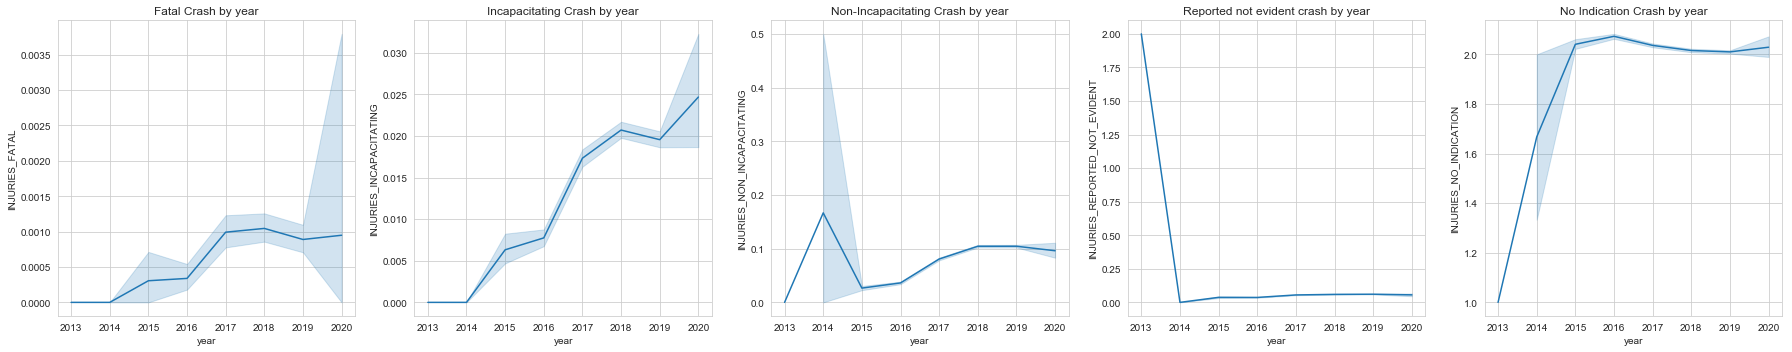

In [24]:
fig, ax = plt.subplots(1, 5, figsize = (25, 5));

sns.lineplot(x="year",y="INJURIES_FATAL",  data=df, ax=ax[0]);
sns.lineplot(x="year", y="INJURIES_INCAPACITATING",  data=df, ax=ax[1]);
sns.lineplot(x="year", y="INJURIES_NON_INCAPACITATING",  data=df, ax=ax[2]);
sns.lineplot(x="year", y="INJURIES_REPORTED_NOT_EVIDENT",  data=df, ax=ax[3]);
sns.lineplot(x="year", y="INJURIES_NO_INDICATION",  data=df, ax=ax[4]);
[ax[i].set_xlabel('year') for i in range(5)]
ax[0].set_title('Fatal Crash by year')
ax[1].set_title('Incapacitating Crash by year')
ax[2].set_title('Non-Incapacitating Crash by year')
ax[3].set_title('Reported not evident crash by year')
ax[4].set_title('No Indication Crash by year')
plt.tight_layout()
plt.show()

#### Traffic crash types by the Month( Bar charts)


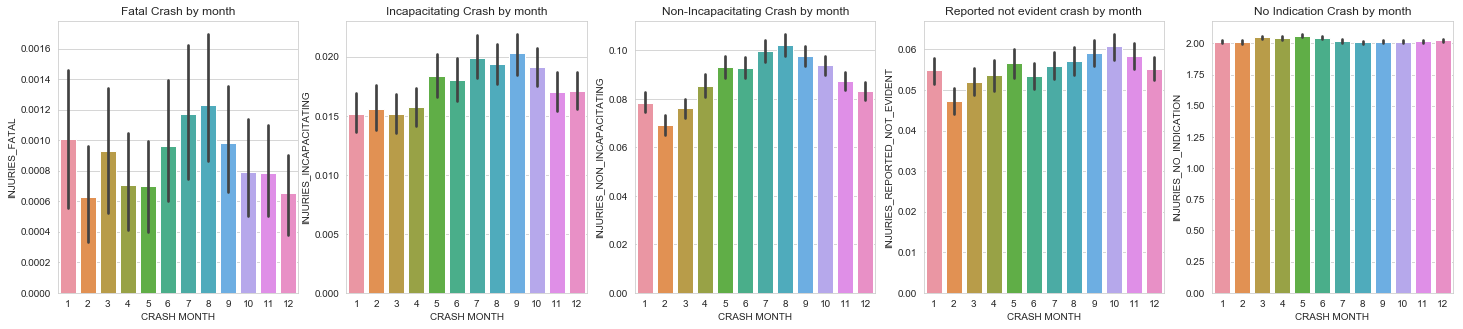

<Figure size 432x288 with 0 Axes>

In [25]:
fig, ax = plt.subplots(1, 5, figsize = (25, 5));

sns.barplot(x="CRASH_MONTH",y="INJURIES_FATAL",  data=df, ax=ax[0]);
sns.barplot(x="CRASH_MONTH", y="INJURIES_INCAPACITATING",  data=df, ax=ax[1]);
sns.barplot(x="CRASH_MONTH", y="INJURIES_NON_INCAPACITATING",  data=df, ax=ax[2]);
sns.barplot(x="CRASH_MONTH", y="INJURIES_REPORTED_NOT_EVIDENT",  data=df, ax=ax[3]);
sns.barplot(x="CRASH_MONTH", y="INJURIES_NO_INDICATION",  data=df, ax=ax[4]);
[ax[i].set_xlabel('CRASH MONTH') for i in range(5)]
ax[0].set_title('Fatal Crash by month')
ax[1].set_title('Incapacitating Crash by month')
ax[2].set_title('Non-Incapacitating Crash by month')
ax[3].set_title('Reported not evident crash by month')
ax[4].set_title('No Indication Crash by month')

plt.show()
plt.tight_layout()

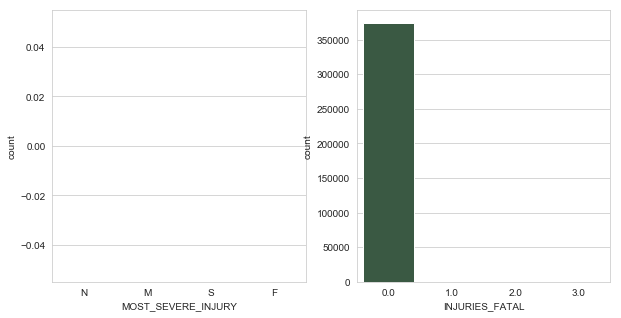

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5));
sns.countplot(x="MOST_SEVERE_INJURY",data=df, palette="Greens_d", order='NMSF',ax = ax[0]);
sns.countplot(x="INJURIES_FATAL",data=df, palette="Greens_d", ax=ax[1]);

#### Traffic crash types by road type and condition

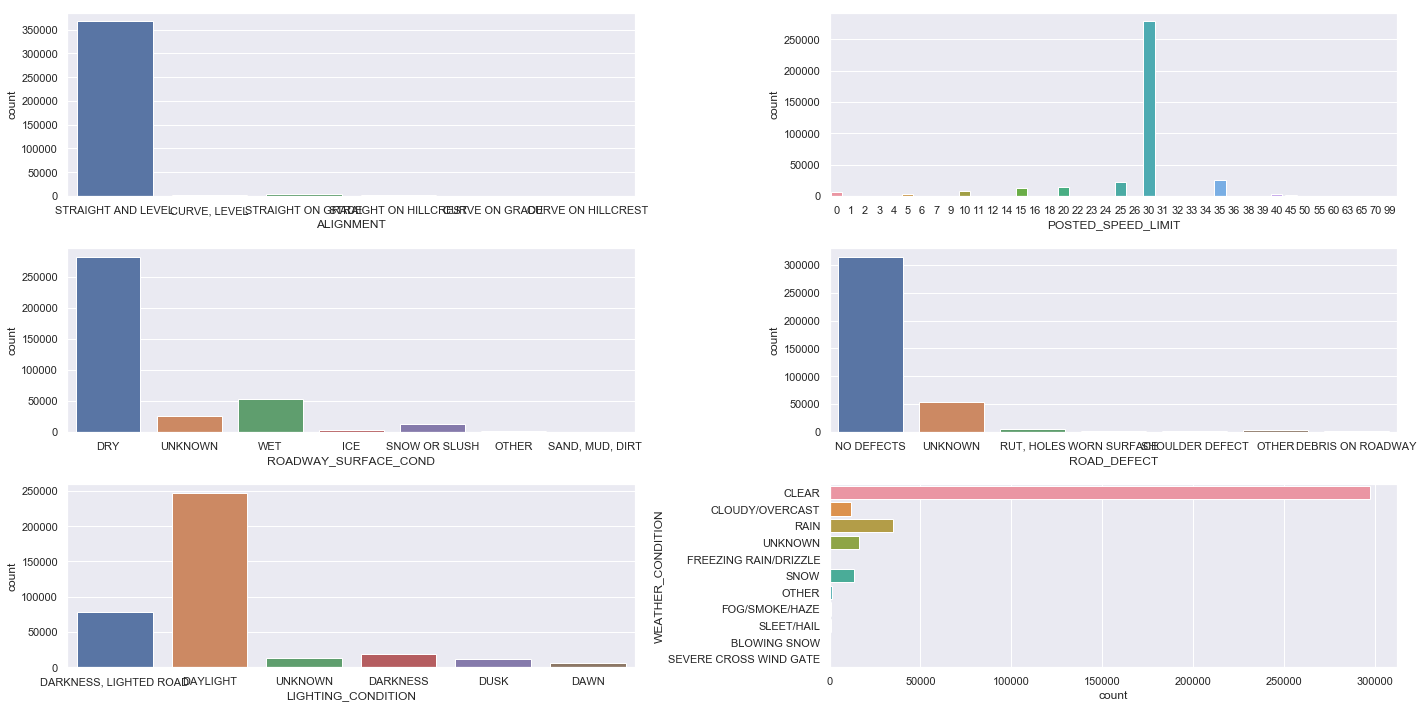

In [27]:
sns.set(font_scale=1) 
fig, ax = plt.subplots(3, 2, figsize = (20, 10));

sns.countplot(x='ALIGNMENT',data=df, ax=ax[0,0]);
sns.countplot(x='POSTED_SPEED_LIMIT',data=df, ax=ax[0,1])
sns.countplot(x='ROADWAY_SURFACE_COND',data=df, ax=ax[1,0])
sns.countplot(x='ROAD_DEFECT',data=df, ax=ax[1,1])
sns.countplot(x='LIGHTING_CONDITION',data=df, ax=ax[2,0])
sns.countplot(y='WEATHER_CONDITION',data=df, ax=ax[2,1])
#[ax[i].set_xlabel('CRASH MONTH') for i in range(5)]
#ax[0].set_title('Road Alignment')
plt.tight_layout()
plt.show()

#### Traffic crash types by trafic Control 

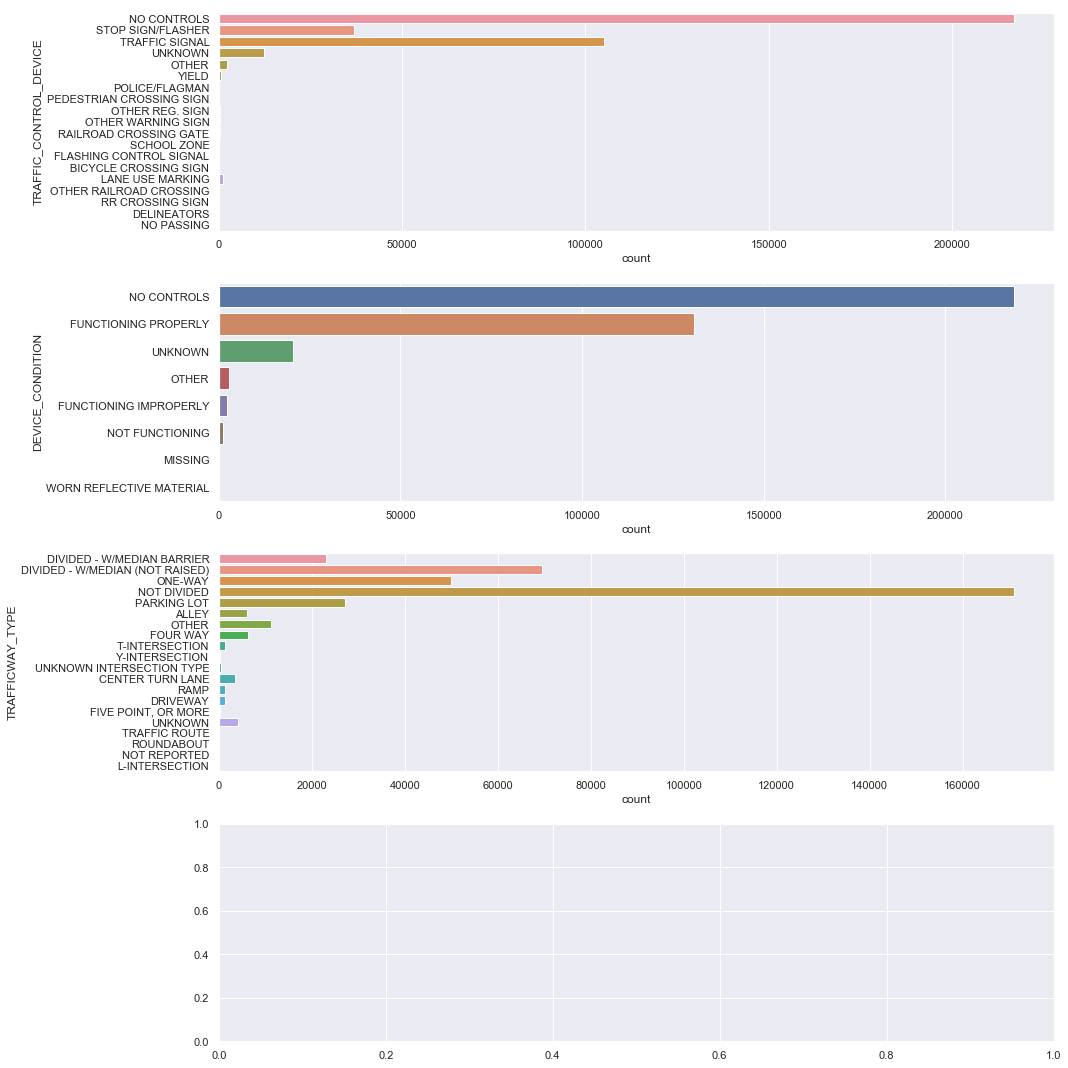

In [28]:
sns.set(font_scale=1) 
fig, ax = plt.subplots(4, figsize = (15, 15));

sns.countplot(y='TRAFFIC_CONTROL_DEVICE',data=df, ax=ax[0]);
sns.countplot(y='DEVICE_CONDITION',data=df, ax=ax[1])
sns.countplot(y='TRAFFICWAY_TYPE',data=df, ax=ax[2])
#sns.countplot(y='LANE_CNT',data=df, ax=ax[3])

plt.tight_layout()

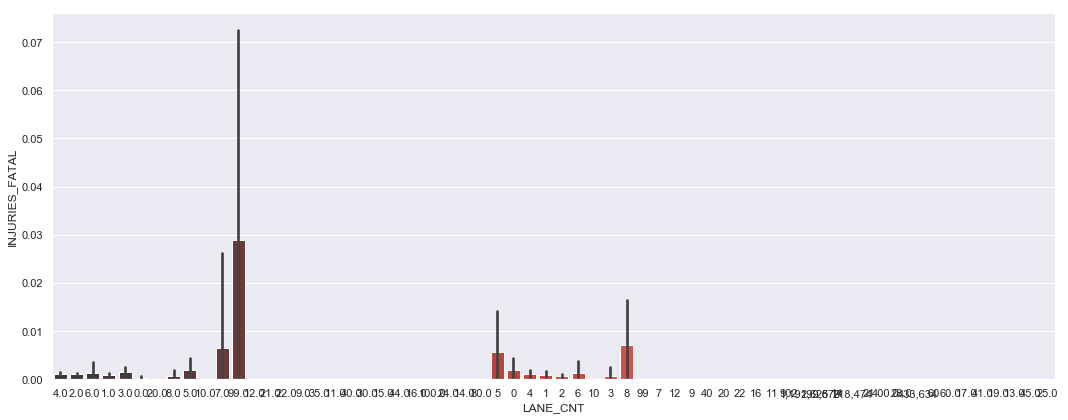

In [29]:
plt.figure(figsize=(15,6))
sns.barplot(x='LANE_CNT',y = 'INJURIES_FATAL',data=df, palette="Reds_d")
plt.tight_layout();

## Visualizing Fatal Crashes and the most related variables

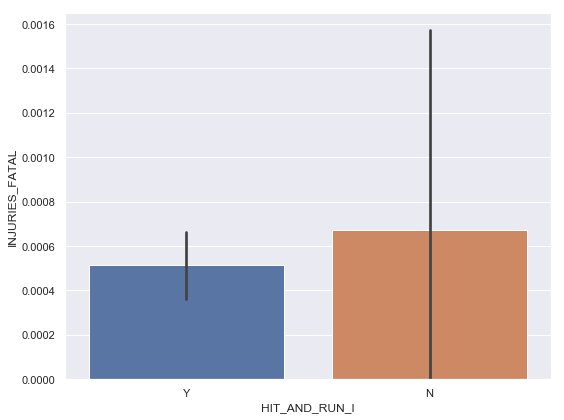

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(x="HIT_AND_RUN_I", y="INJURIES_FATAL",  data=df);
plt.tight_layout()

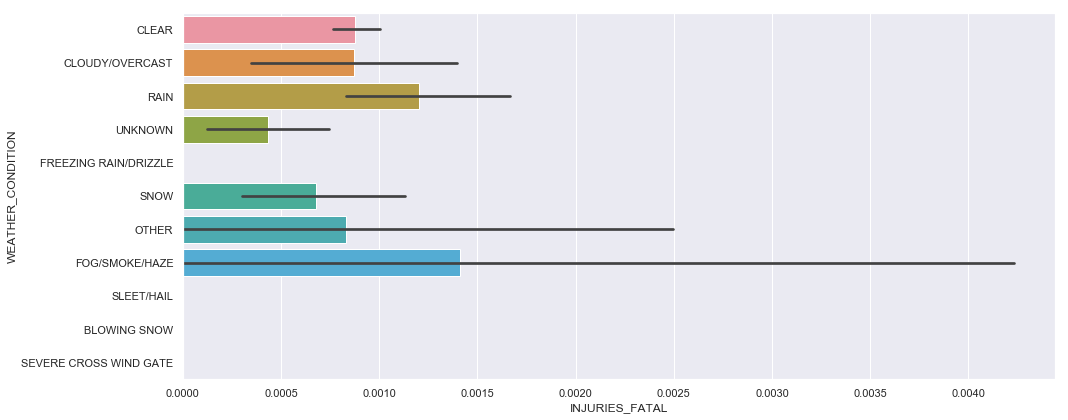

In [31]:
plt.figure(figsize=(15,6))
sns.barplot(y="WEATHER_CONDITION", x="INJURIES_FATAL",  data=df);
plt.tight_layout()

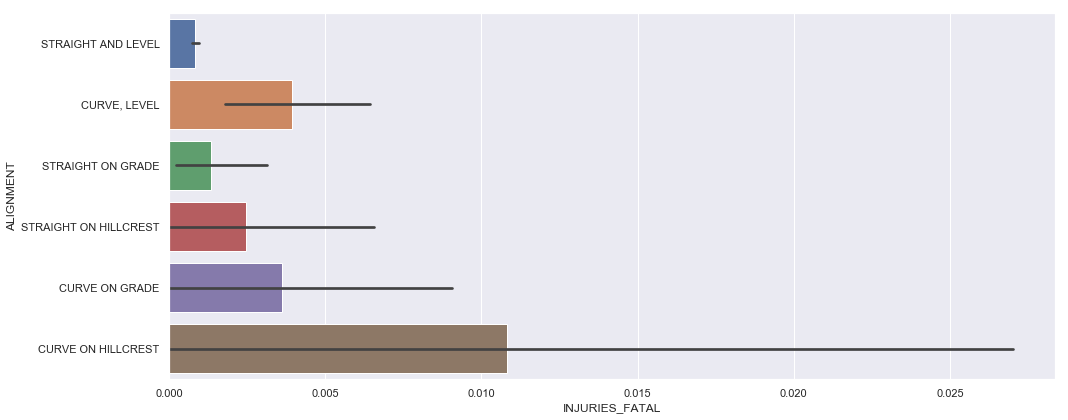

In [32]:
plt.figure(figsize=(15,6))
sns.barplot(y="ALIGNMENT", x="INJURIES_FATAL",  data=df);
plt.tight_layout()

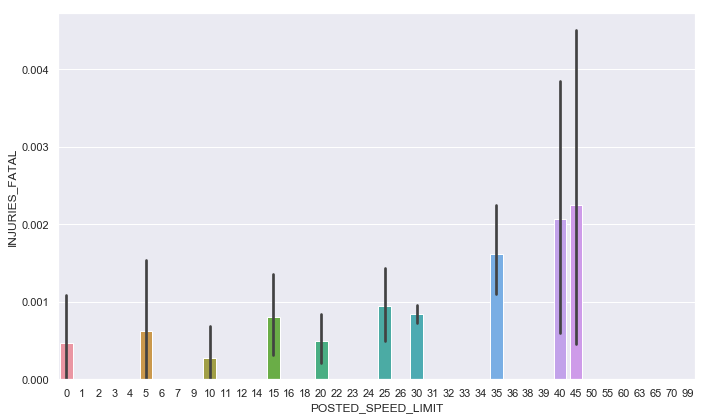

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x="POSTED_SPEED_LIMIT", y="INJURIES_FATAL",  data=df);
plt.tight_layout()

## Evaluating correlated features

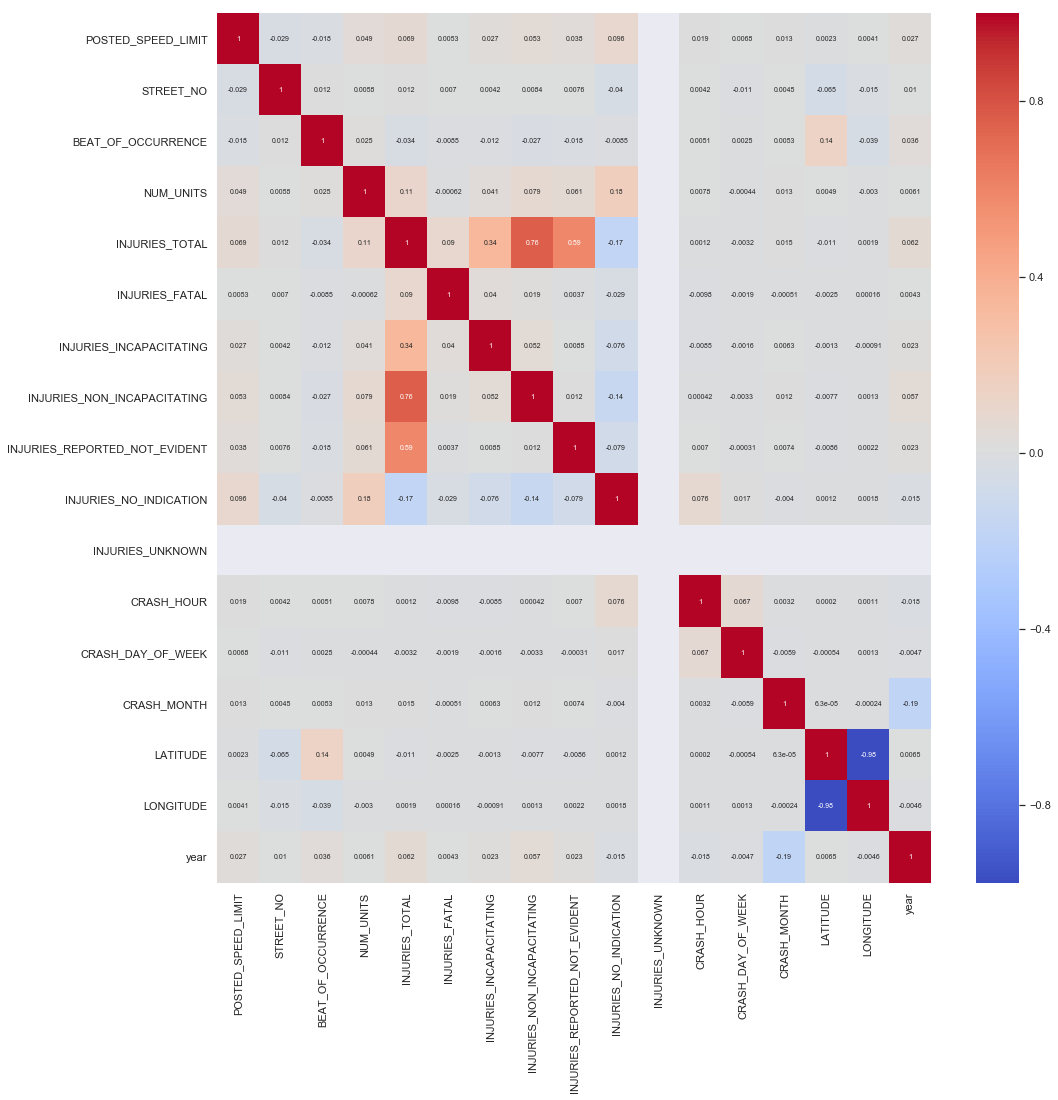

In [34]:
import matplotlib.pyplot as plt

df_corr = df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(df_corr, annot=True,annot_kws={"size":7}, cmap = 'coolwarm')

In [35]:
df3 = df.groupby('year')['INJURIES_TOTAL'].count()
df3

year
2013         1
2014         6
2015      9816
2016     44272
2017     83655
2018    117664
2019    115867
2020      3162
Name: INJURIES_TOTAL, dtype: int64

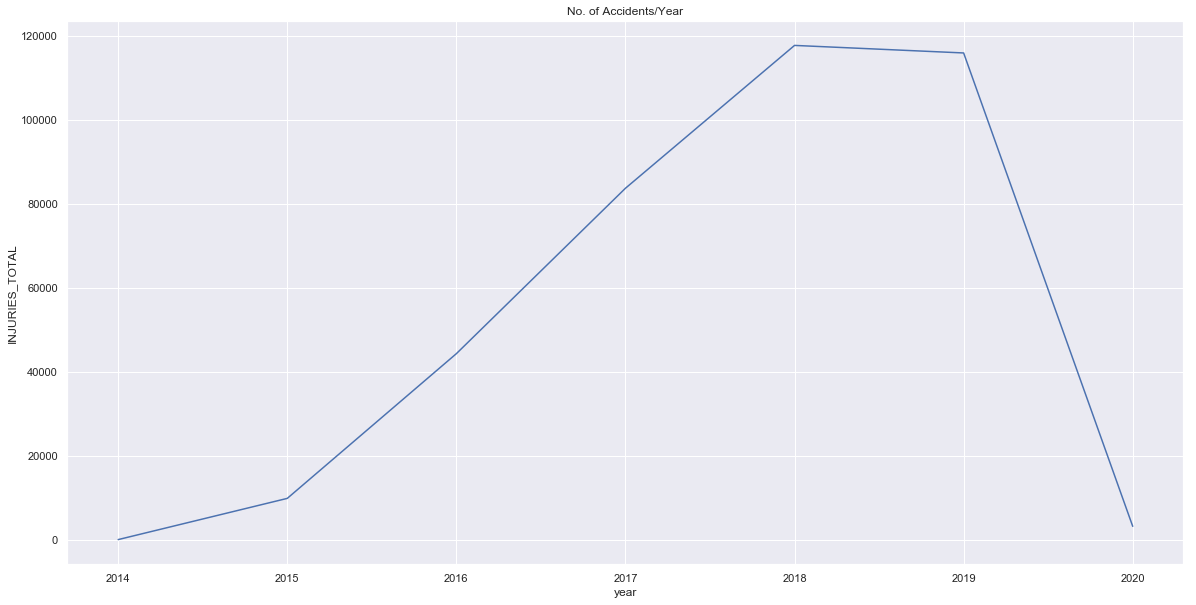

In [36]:
plt.figure(figsize = (20,10))
plt.rcParams.update({'font.size' : 18})

df3.iloc[1:].plot(figsize = (20,10), legend =  False)
plt.xlabel("year")
plt.ylabel("INJURIES_TOTAL")
plt.title("No. of Accidents/Year")
plt.show()

In [37]:
df4 = df.groupby('BEAT_OF_OCCURRENCE')['INJURIES_TOTAL'].count()

In [38]:
df4

BEAT_OF_OCCURRENCE
111.0     2089
112.0     1545
113.0     1052
114.0     4438
121.0     2274
122.0     4407
123.0     2550
124.0     2161
131.0     2489
132.0     2483
133.0      959
211.0     1048
212.0      831
213.0      892
214.0      493
215.0      678
221.0      482
222.0     1240
223.0      661
224.0      706
225.0      917
231.0      477
232.0      461
233.0      857
234.0     1398
235.0      942
311.0      613
312.0     1317
313.0      586
314.0      604
          ... 
2221.0    1437
2222.0     774
2223.0    1559
2232.0    1178
2233.0     744
2234.0    1245
2411.0    2440
2412.0    1920
2413.0    2949
2422.0     724
2423.0     705
2424.0    1131
2431.0     497
2432.0    1704
2433.0    1865
2511.0    1330
2512.0    2660
2513.0     956
2514.0    1642
2515.0    1899
2521.0    2093
2522.0    1459
2523.0    1320
2524.0    1211
2525.0     817
2531.0     981
2532.0     959
2533.0    2386
2534.0    1506
2535.0    1150
Name: INJURIES_TOTAL, Length: 274, dtype: int64

In [39]:
df5 = df.groupby('WEATHER_CONDITION')['INJURIES_TOTAL']. count()

In [40]:
df5

WEATHER_CONDITION
BLOWING SNOW                  28
CLEAR                     295877
CLOUDY/OVERCAST            11480
FOG/SMOKE/HAZE               709
FREEZING RAIN/DRIZZLE        232
OTHER                       1201
RAIN                       34871
SEVERE CROSS WIND GATE        76
SLEET/HAIL                   611
SNOW                       13232
UNKNOWN                    16126
Name: INJURIES_TOTAL, dtype: int64